### Gridflow process
This walkthrough highlights the main steps: importing dependencies, configuring inputs, partitioning countries into zones, summarizing zonal data, building the flow network, and producing EPM-ready CSVs.

#### Step 1: imports (see `README.md` for installation hints)
Only bring in the plotting tools and Gridflow modules that the notebook actually uses; consult `README.md` if you encounter dependency issues.

In [1]:
# To help debug import errors
if False:
    import sys
    print("Python executable:", sys.executable)
    print("sys.path:", sys.path[0])
    !conda list

In [2]:


import matplotlib.pyplot as plt

%matplotlib inline

from pathlib import Path

from gridflow import model
from gridflow import epm_input_generator
from gridflow.visuals import country_viz

plt.style.use('fivethirtyeight')

#### Step 2: user inputs
Centralize the dataset paths, countries, and modeling configuration so you can adjust everything before running the workflow.

In [3]:
# dataset locations and region configuration
data_path = 'data/global_datasets'  # path containing borders, rasters, and grid.gpkg

countries = ["LUX"]  # ISO3 codes for the countries to model
n_zones = 5  # target number of zones per the region

# epm
epm_input_raw = 'data/epm_inputs_raw'  # raw EPM CSV templates
epm_output_dir = 'data/epm_inputs'  # destination for zonalized CSVs

#### Step 3: build the region and create zones
Instantiate the region object for the selected countries and segment it into the requested number of zones to prepare the spatial structure.

In [4]:
region = model.region(countries, data_path)
region.create_zones(n=n_zones)

##### Inspect the zoning results
Review the geopandas table that describes each zone so you can verify the segmentation before enriching it.

In [5]:
region.zones

,geometry,country
0,"POLYGON ((6.01667 50.18333, 6.01667 50.175, 5....",LUX
1,"POLYGON ((6.00833 49.90833, 6.00833 49.9, 5.98...",LUX
2,"POLYGON ((6.20833 49.89167, 6.20833 49.88333, ...",LUX
3,"MULTIPOLYGON (((6.36667 49.85, 6.36667 49.8416...",LUX
4,"MULTIPOLYGON (((5.99167 49.69167, 5.99167 49.6...",LUX


#### Step 5: enrich zones and compute statistics
Populate the zones with aggregated datasets (population, renewables) and use the built-in stats to summarize key metrics.

In [6]:
region.set_zone_data()
region.zone_stats

/opt/anaconda3/envs/gridflow_env/lib/python3.9/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.renewables.ninja'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/envs/gridflow_env/lib/python3.9/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.renewables.ninja'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/envs/gridflow_env/lib/python3.9/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.renewables.ninja'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warn

,population
0,100577.015625
1,50612.015625
2,200653.359375
3,188002.625000
4,516025.562500


#### Step 6: create and visualize the network
Generate the zone-to-zone flow network, visualize it on the country map, and display the computed flow matrix.

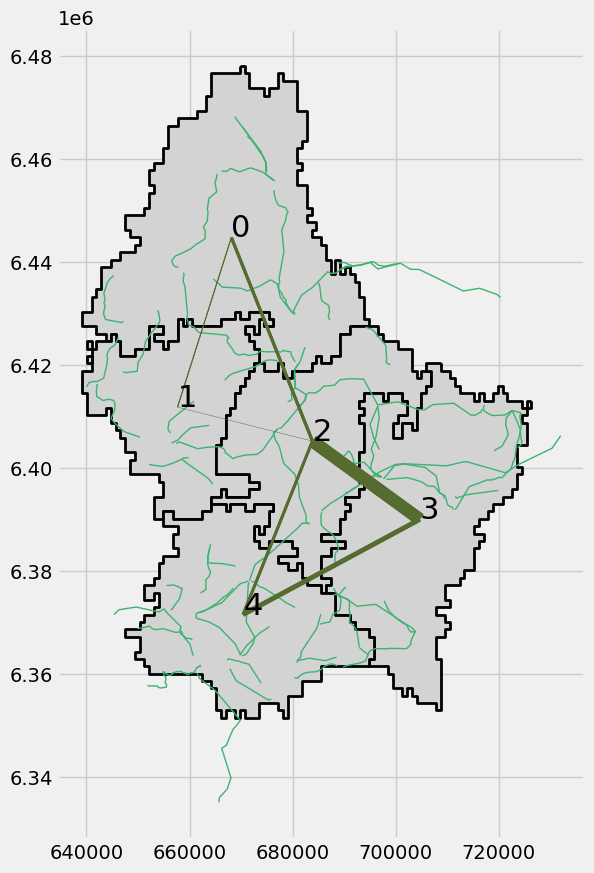

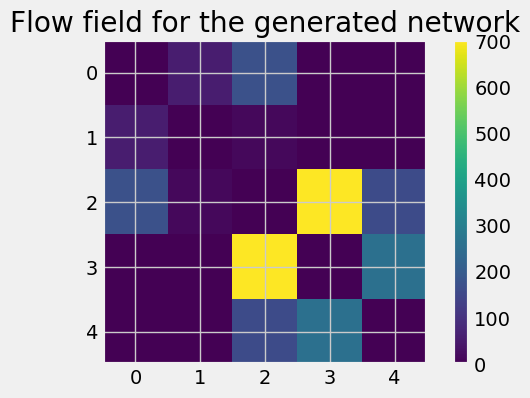

In [7]:
region.create_network()
country_viz(region)

plt.figure(figsize=(6, 4))
plt.imshow(region.grid.flow)
plt.title('Flow field for the generated network')
plt.colorbar()

#### Step 7: auto-transform inputs for EPM
Once the zone split and network are defined, run the EPM input generator to reshape the raw CSV templates into zonal files that match `region.zones`.

In [8]:
epm_input_generator.generate_epm_inputs(region, epm_input_raw, epm_output_dir)
print(f'Zonal inputs written to {Path(epm_output_dir).resolve()}')

KeyError: 'population'

#### Next steps
Adjust the user inputs, explore additional metrics, or export region-aware artifacts for downstream modeling after these core steps complete.